## Getting started 
* Read the data.
* split into train-test sets.
* fit the model to the train data.
* predict the test data.

In [1]:
import dogs_vs_cats as dvc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_files = dvc.image_files()
perm = np.random.permutation(len(image_files))

# Shuffle the files
# Why np.array?--> (indexing with array of ints is not allowed for lists! try it anyway!)
image_files = np.array(image_files)[perm]


test_files = image_files[23000:]
train_files = image_files[:23000]

data file train.zip has already been downloaded
Data has already been extracted


In [3]:
image_files = dvc.image_files()
image_files = np.array(image_files)
image_files[perm]

data file train.zip has already been downloaded
Data has already been extracted


array(['train/dog.2762.jpg', 'train/cat.12495.jpg', 'train/dog.1845.jpg',
       ..., 'train/dog.903.jpg', 'train/dog.4616.jpg',
       'train/cat.11781.jpg'], 
      dtype='<U19')

In [9]:
chosen_files = np.random.choice(train_files,500)
train_features,train_labels = dvc.load_image_set(chosen_files,image_size=(3,33,33))

loading image (1/500)
loading image (101/500)
loading image (201/500)
loading image (301/500)
loading image (401/500)


In [8]:
train_features.shape

(500, 3, 33, 33)

In [10]:
train_features = np.mean(train_features,axis=1).reshape((chosen_files.shape[0],33*33))
train_features.shape

(500, 1089)

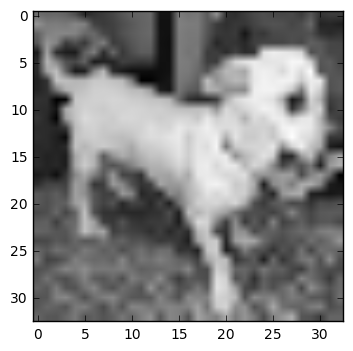

In [11]:
plt.imshow(train_features[11].reshape(33,33),cmap="gray")

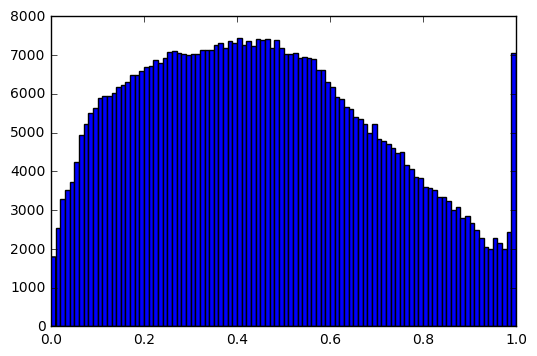

In [12]:
_ = plt.hist(train_features.ravel(),bins=100)

### Fit & test support vector machine classifier
Doc of the function: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Mathematical formulation: http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation


In [13]:
from sklearn import svm

classifier = svm.SVC(verbose=True)
classifier.fit(train_features,train_labels)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [15]:

test_features,test_labels = dvc.load_image_set(test_files,image_size=(3,33,33))
test_features = np.mean(test_features,axis=1).reshape((len(test_files),33*33))
test_features.shape

loading image (1/2000)
loading image (101/2000)
loading image (201/2000)
loading image (301/2000)
loading image (401/2000)
loading image (501/2000)
loading image (601/2000)
loading image (701/2000)
loading image (801/2000)
loading image (901/2000)
loading image (1001/2000)
loading image (1101/2000)
loading image (1201/2000)
loading image (1301/2000)
loading image (1401/2000)
loading image (1501/2000)
loading image (1601/2000)
loading image (1701/2000)
loading image (1801/2000)
loading image (1901/2000)


(2000, 1089)

In [16]:
test_preds = classifier.predict(test_features)

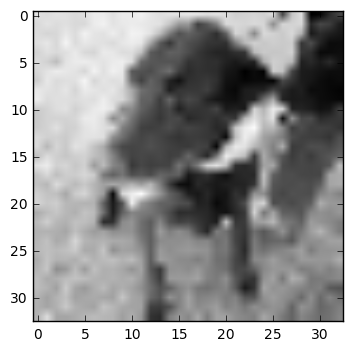

In [17]:
plt.imshow(test_features[34].reshape(33,33),cmap="gray")

In [18]:
test_preds[34]

0

In [19]:
np.sum(test_preds == test_labels)/len(test_labels)

0.47749999999999998

In [20]:
# Equivalent to:
classifier.score(test_features,test_labels)

0.47749999999999998

In [21]:
classifier.score(train_features,train_labels)

0.53400000000000003

### Hyper-parameter estimation with CV
http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

In [22]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

In [23]:
from sklearn.grid_search import GridSearchCV

clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,n_jobs=-1,verbose=True)
clf.fit(train_features, train_labels)

clf.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/gonzalo/anaconda3/envs/python_course/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/gonzalo/anaconda3/envs/python_course/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.0s finished


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
clf.score(train_features,train_labels)

0.79400000000000004

In [25]:
clf.score(test_features,test_labels) # :(

0.55449999999999999

### Confussion Matrix

In [26]:
from sklearn import metrics
test_preds = clf.predict(test_features)
metrics.confusion_matrix(test_labels, test_preds)

array([[601, 354],
       [537, 508]])

### ROC 
http://scikit-learn.org/0.17/auto_examples/model_selection/plot_roc_crossval.html#example-model-selection-plot-roc-crossval-py


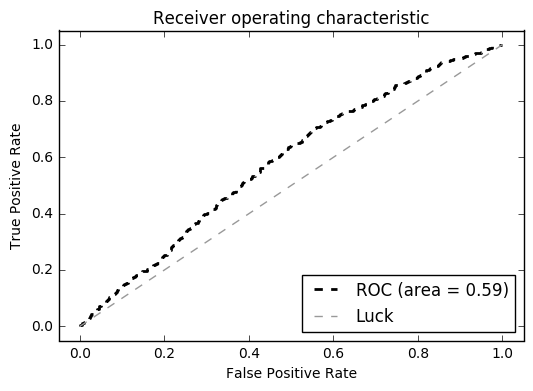

In [27]:
from sklearn import metrics
test_scores = clf.decision_function(test_features)
fpr, tpr, thresholds = metrics.roc_curve(test_labels, test_scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--',
         label='ROC (area = %0.2f)' % roc_auc, lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [24]:
import sklearn
sklearn.__version__

'0.18'

### Exercise 7
Train a different classifier. http://scikit-learn.org/stable/supervised_learning.html
